In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, KFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, mean_squared_error, roc_curve, auc, average_precision_score, RocCurveDisplay
import scipy.stats as stats
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import mutual_info_classif           
import shap


# Load the dataset
df = pd.read_csv('Dataset/diabetes.csv')

## Load dataset information

In [3]:
# Load dataset information
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
# Count Outcome
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

## Data type & Null count

In [6]:
# Data type & Null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# Check for null values in specific columns
print("Null values in Pregnancies column: {0}".format(df['Pregnancies'].isnull().sum()))
print("Null values in Glucose column: {0}".format(df['Glucose'].isnull().sum()))
print("Null values in BloodPressure column: {0}".format(df['BloodPressure'].isnull().sum()))
print("Null values in SkinThickness column: {0}".format(df['SkinThickness'].isnull().sum()))
print("Null values in Insulin column: {0}".format(df['Insulin'].isnull().sum()))
print("Null values in BMI column: {0}".format(df['BMI'].isnull().sum()))
print("Null values in DiabetesPedigreeFunction column: {0}".format(df['DiabetesPedigreeFunction'].isnull().sum()))
print("Null values in Age column: {0}".format(df['Age'].isnull().sum()))
print("Null values in Outcome column: {0}".format(df['Outcome'].isnull().sum()))

Null values in Pregnancies column: 0
Null values in Glucose column: 0
Null values in BloodPressure column: 0
Null values in SkinThickness column: 0
Null values in Insulin column: 0
Null values in BMI column: 0
Null values in DiabetesPedigreeFunction column: 0
Null values in Age column: 0
Null values in Outcome column: 0


# Check if there have missing value (0) or not

In [9]:
# Check if there have missing value (0) or not
print("No. of rows with Glucose value 0 is: {0}".format(len(df.loc[df['Glucose'] == 0])))
print("No. of rows with BloodPressure 0 is: {0}".format(len(df.loc[df['BloodPressure'] == 0])))
print("No. of rows with SkinThikness 0 is: {0}".format(len(df.loc[df['SkinThickness'] == 0])))
print("No. of rows with Insulin 0 is: {0}".format(len(df.loc[df['Insulin'] == 0])))
print("No. of rows with BMI 0 is: {0}".format(len(df.loc[df['BMI'] == 0])))
print("No. of rows with DiabetesPedigreeFunction 0 is: {0}".format(len(df.loc[df['DiabetesPedigreeFunction'] == 0])))
print("No. of rows with age 0 is: {0}".format(len(df.loc[df['Age'] == 0])))

No. of rows with Glucose value 0 is: 5
No. of rows with BloodPressure 0 is: 35
No. of rows with SkinThikness 0 is: 227
No. of rows with Insulin 0 is: 374
No. of rows with BMI 0 is: 11
No. of rows with DiabetesPedigreeFunction 0 is: 0
No. of rows with age 0 is: 0


# Fill missing value (0) by its mean

In [11]:
# Fill missing value (0) by its mean
Fill_Mean = SimpleImputer(strategy='mean', missing_values=0)
#Fill_Mean = Fill_Mean.fit(df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']])
#df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = Fill_Mean.transform(df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']])
Fill_Mean = Fill_Mean.fit(df[['Glucose','BloodPressure','BMI']])
#df[['Glucose','BloodPressure','SkinThickness','BMI']] = Fill_Mean.transform(df[['Glucose','BloodPressure','SkinThickness','BMI']])
df[['Glucose','BloodPressure','BMI']] = Fill_Mean.transform(df[['Glucose','BloodPressure','BMI']])

# Check if there still have missing value (0) or not

In [13]:
# Check if there still have missing value (0) or not
print("No. of rows with Glucose value 0 is: {0}".format(len(df.loc[df['Glucose'] == 0])))
print("No. of rows with BloodPressure 0 is: {0}".format(len(df.loc[df['BloodPressure'] == 0])))
print("No. of rows with SkinThikness 0 is: {0}".format(len(df.loc[df['SkinThickness'] == 0])))
print("No. of rows with Insulin 0 is: {0}".format(len(df.loc[df['Insulin'] == 0])))
print("No. of rows with BMI 0 is: {0}".format(len(df.loc[df['BMI'] == 0])))
print("No. of rows with DiabetesPedigreeFunction 0 is: {0}".format(len(df.loc[df['DiabetesPedigreeFunction'] == 0])))
print("No. of rows with age 0 is: {0}".format(len(df.loc[df['Age'] == 0])))

No. of rows with Glucose value 0 is: 0
No. of rows with BloodPressure 0 is: 0
No. of rows with SkinThikness 0 is: 227
No. of rows with Insulin 0 is: 374
No. of rows with BMI 0 is: 0
No. of rows with DiabetesPedigreeFunction 0 is: 0
No. of rows with age 0 is: 0


# Identify rows where 'SkinThickness' is 0

In [15]:
# Identify rows where 'SkinThickness' is 0
zero_SkinThickness_rows = df['SkinThickness'] == 0
non_zero_SkinThickness_rows = df['SkinThickness'] != 0

In [16]:
# Features for prediction
features = ['Glucose', 'BMI','Age', 'BloodPressure'] ## Based on Correlation Matrix before Apply Polynomial Regression

# Apply Polynomial Regression to predict missing value (SkinThickness)

In [18]:
# Polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
#poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(df.loc[non_zero_SkinThickness_rows, features])
X_poly_zero = poly.transform(df.loc[zero_SkinThickness_rows, features])

In [19]:
# Target variable
y_SkinThickness = df.loc[non_zero_SkinThickness_rows, 'SkinThickness']

In [20]:
# Train the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y_SkinThickness)

LinearRegression()

# Predict missing 'SkinThickness' values

In [22]:
# Predict missing 'SkinThickness' values
predicted_SkinThickness = model.predict(X_poly_zero)

# Fill the missing 'SkinThickness' values

In [24]:
# Fill the missing 'SkinThickness' values
df.loc[zero_SkinThickness_rows, 'SkinThickness'] = predicted_SkinThickness

C:\Users\user\AppData\Local\Temp\ipykernel_13744\2586123976.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[19.43310464 21.90447927 32.35159294 28.33726353 33.99423938 35.8124066
 26.47582279 27.06895818 26.58616826 32.09068795 37.04790656 37.41836047
 30.74114278 14.05473733 31.06739863 36.93201267 26.33889225 26.27576328
 28.85545217 37.70822675 28.43725733 31.32166556 20.98311832 31.54529092
 36.17683759 38.4572848  29.16022526 39.13384227 28.46950422 40.36377076
 10.455307   24.3901921  36.58915804 20.29989632 17.06743003 35.65999303
 15.79472548 29.97322915 28.50144058 32.03517376 28.84767333 26.61549741
 29.7697212  25.47323778 30.9171333  28.22602585 19.61014053 31.0243439
 33.67315478 18.55973926 43.864927   28.6461028  27.1853426  28.80630537
 27.93004012 28.47381263 41.21608174 36.13195024 18.8574458  22.2094413
 25.89837917 15.85548421 28.78768946 45.48935861 17.81073123 36.73785708
 32.4

# Check if there have missing value (0) or not

In [26]:
# Check if there have missing value (0) or not
print("No. of rows with Glucose value 0 is: {0}".format(len(df.loc[df['Glucose'] == 0])))
print("No. of rows with BloodPressure 0 is: {0}".format(len(df.loc[df['BloodPressure'] == 0])))
print("No. of rows with SkinThikness 0 is: {0}".format(len(df.loc[df['SkinThickness'] == 0])))
print("No. of rows with Insulin 0 is: {0}".format(len(df.loc[df['Insulin'] == 0])))
print("No. of rows with BMI 0 is: {0}".format(len(df.loc[df['BMI'] == 0])))
print("No. of rows with DiabetesPedigreeFunction 0 is: {0}".format(len(df.loc[df['DiabetesPedigreeFunction'] == 0])))
print("No. of rows with age 0 is: {0}".format(len(df.loc[df['Age'] == 0])))

No. of rows with Glucose value 0 is: 0
No. of rows with BloodPressure 0 is: 0
No. of rows with SkinThikness 0 is: 0
No. of rows with Insulin 0 is: 374
No. of rows with BMI 0 is: 0
No. of rows with DiabetesPedigreeFunction 0 is: 0
No. of rows with age 0 is: 0


## Identify rows where 'Insulin' is 0

In [28]:
# Identify rows where 'Insulin' is 0
zero_insulin_rows = df['Insulin'] == 0
non_zero_insulin_rows = df['Insulin'] != 0

In [29]:
# Features for prediction
#features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age']
#features = ['Glucose', 'SkinThickness', 'BMI','Age'] ## Based on Correlation Matrix before Apply Polynomial Regression
features = ['Glucose', 'BMI','Age', 'SkinThickness', 'BloodPressure'] ## Based on Correlation Matrix before Apply Polynomial Regression

## Apply Polynomial Regression to predict missing value (Insulin)

In [31]:
# Polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
#poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(df.loc[non_zero_insulin_rows, features])
X_poly_zero = poly.transform(df.loc[zero_insulin_rows, features])

In [32]:
# Target variable
y_Insulin = df.loc[non_zero_insulin_rows, 'Insulin']

In [33]:
# Train the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y_Insulin)

LinearRegression()

## Predict missing 'Insulin' values

In [35]:
# Predict missing 'Insulin' values
predicted_insulin = model.predict(X_poly_zero)

## Fill the missing 'Insulin' values

In [37]:
# Fill the missing 'Insulin' values
df.loc[zero_insulin_rows, 'Insulin'] = predicted_insulin

C:\Users\user\AppData\Local\Temp\ipykernel_13744\357416716.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[220.06155804  53.9404207  229.99903433 105.89221414 139.9392398
 129.28906206 132.46957463 258.28813089 177.38795949  96.45367641
 107.15082068 122.71325675 279.55373151 134.92541329 209.65666514
 121.10756281 246.32067016  13.22145175 124.89023428 176.59423992
 106.85151155  72.93094884 172.45820912  54.55041862 222.26910097
 321.08993643 211.54268217  30.84999247 123.33134807 117.60320988
  42.93714842 199.38381574  75.21851706 173.06178001   6.83659169
 151.89329651  89.01488034 105.79094149 150.0768613  156.06647487
  61.9506515  142.76358205  45.18103432  99.68135723 186.18962807
 106.70816578 119.03904252  51.59559684  89.24212629 184.23700985
 101.38520809 101.86383679  23.85613086 201.73075084  85.38790396
 252.56373827 198.3217821   99.29282368  68.97246353  31.63368303
  50.29374465 1

## Check if there have missing value (0) or not

In [39]:
# Check if there have missing value (0) or not
print("No. of rows with Glucose value 0 is: {0}".format(len(df.loc[df['Glucose'] == 0])))
print("No. of rows with BloodPressure 0 is: {0}".format(len(df.loc[df['BloodPressure'] == 0])))
print("No. of rows with SkinThikness 0 is: {0}".format(len(df.loc[df['SkinThickness'] == 0])))
print("No. of rows with Insulin 0 is: {0}".format(len(df.loc[df['Insulin'] == 0])))
print("No. of rows with BMI 0 is: {0}".format(len(df.loc[df['BMI'] == 0])))
print("No. of rows with DiabetesPedigreeFunction 0 is: {0}".format(len(df.loc[df['DiabetesPedigreeFunction'] == 0])))
print("No. of rows with age 0 is: {0}".format(len(df.loc[df['Age'] == 0])))

No. of rows with Glucose value 0 is: 0
No. of rows with BloodPressure 0 is: 0
No. of rows with SkinThikness 0 is: 0
No. of rows with Insulin 0 is: 0
No. of rows with BMI 0 is: 0
No. of rows with DiabetesPedigreeFunction 0 is: 0
No. of rows with age 0 is: 0


## Check dataset

In [41]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,220.061558,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,53.940421,26.6,0.351,31,0
2,8,183.0,64.0,19.433105,229.999034,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,163.653538,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,30.256833,199.507326,30.1,0.349,47,1


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


## Check Normal Distribution (Q-Q plot)

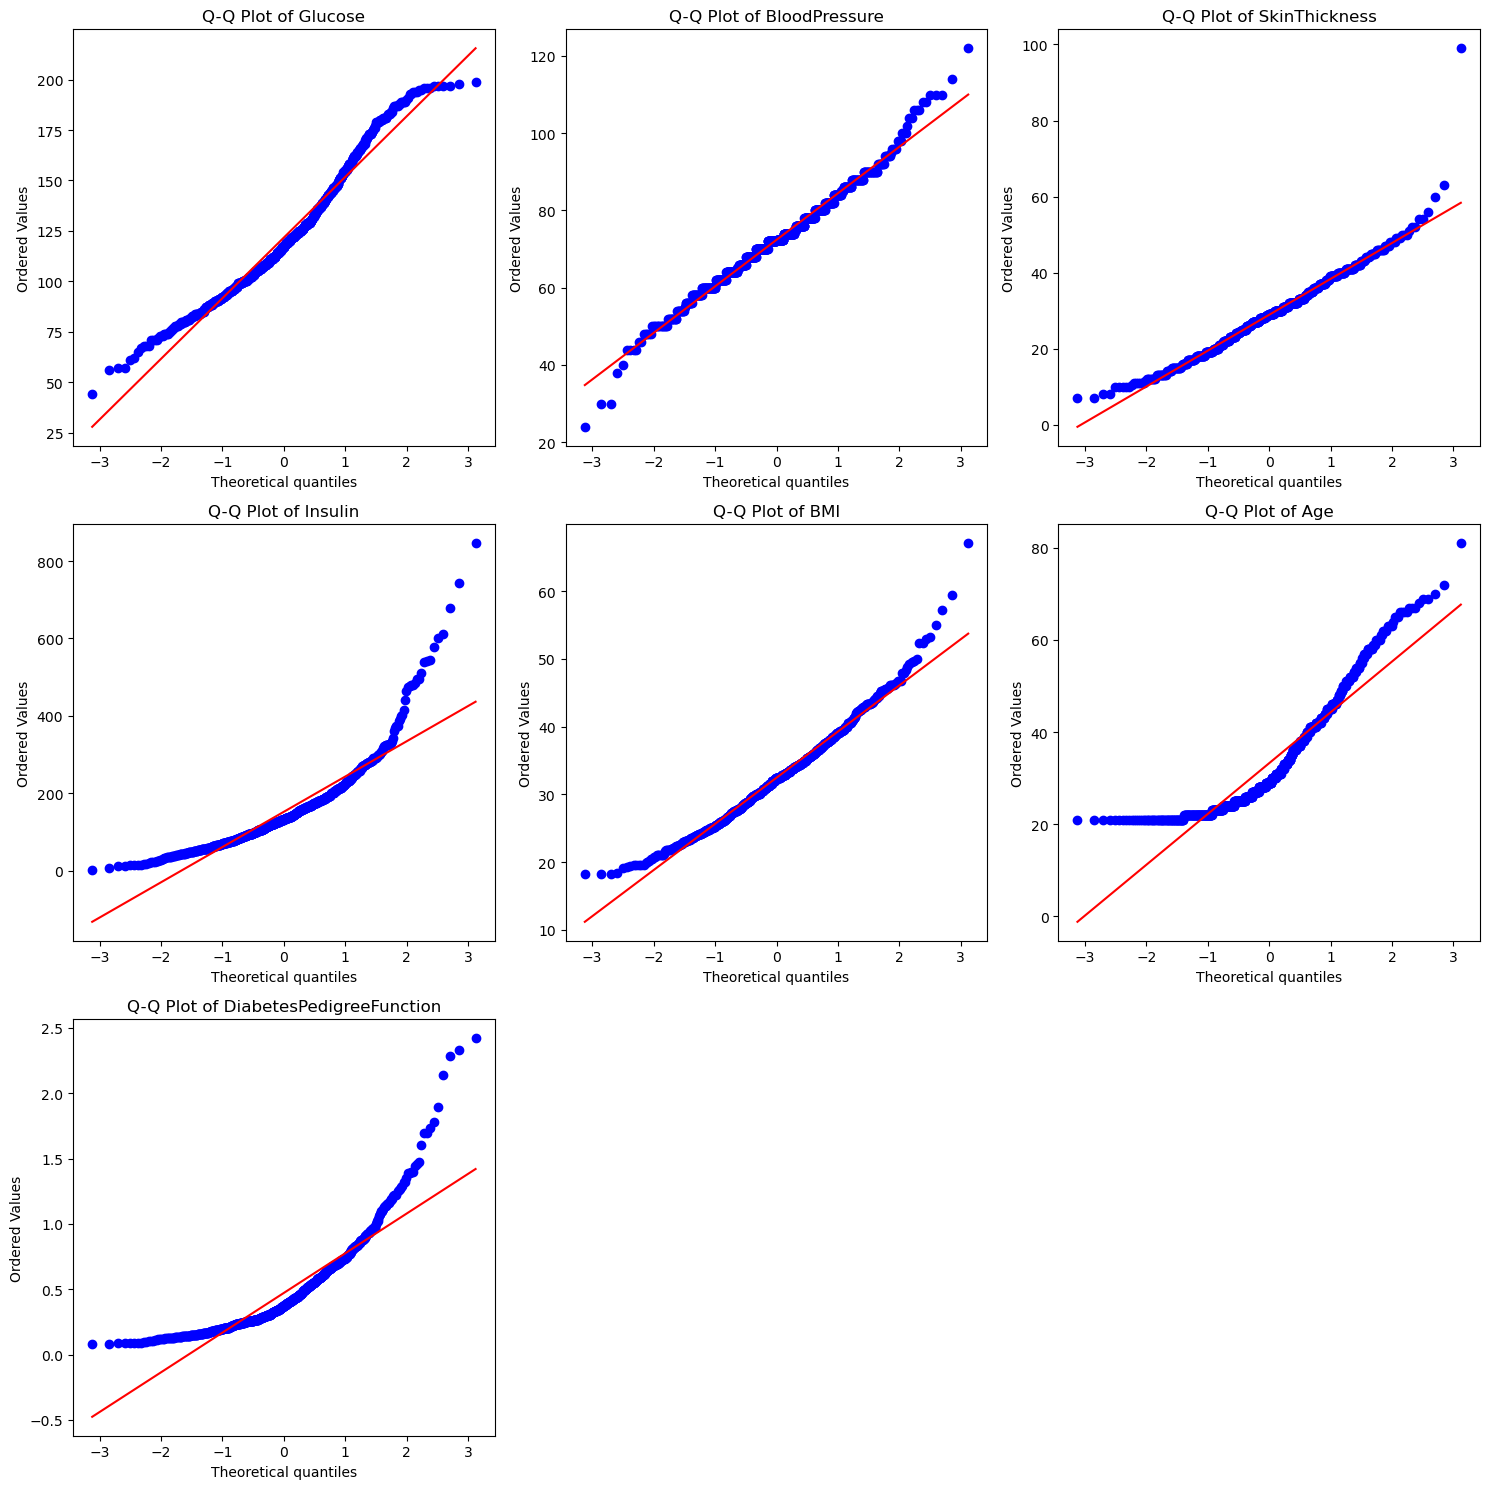

In [44]:
# Create Q-Q plots
def qq_plot(data, feature, ax):
    stats.probplot(data[feature], dist="norm", plot=ax)
    ax.set_title(f'Q-Q Plot of {feature}')

# Plot Q-Q graphs for the features in a 3x3 grid
features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age', 'DiabetesPedigreeFunction']
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    qq_plot(df, feature, axs[row, col])

# Hide any empty subplots
for j in range(i + 1, 9):
    row = j // 3
    col = j % 3
    fig.delaxes(axs[row, col])

plt.tight_layout()
plt.show()


## Check Feature importance

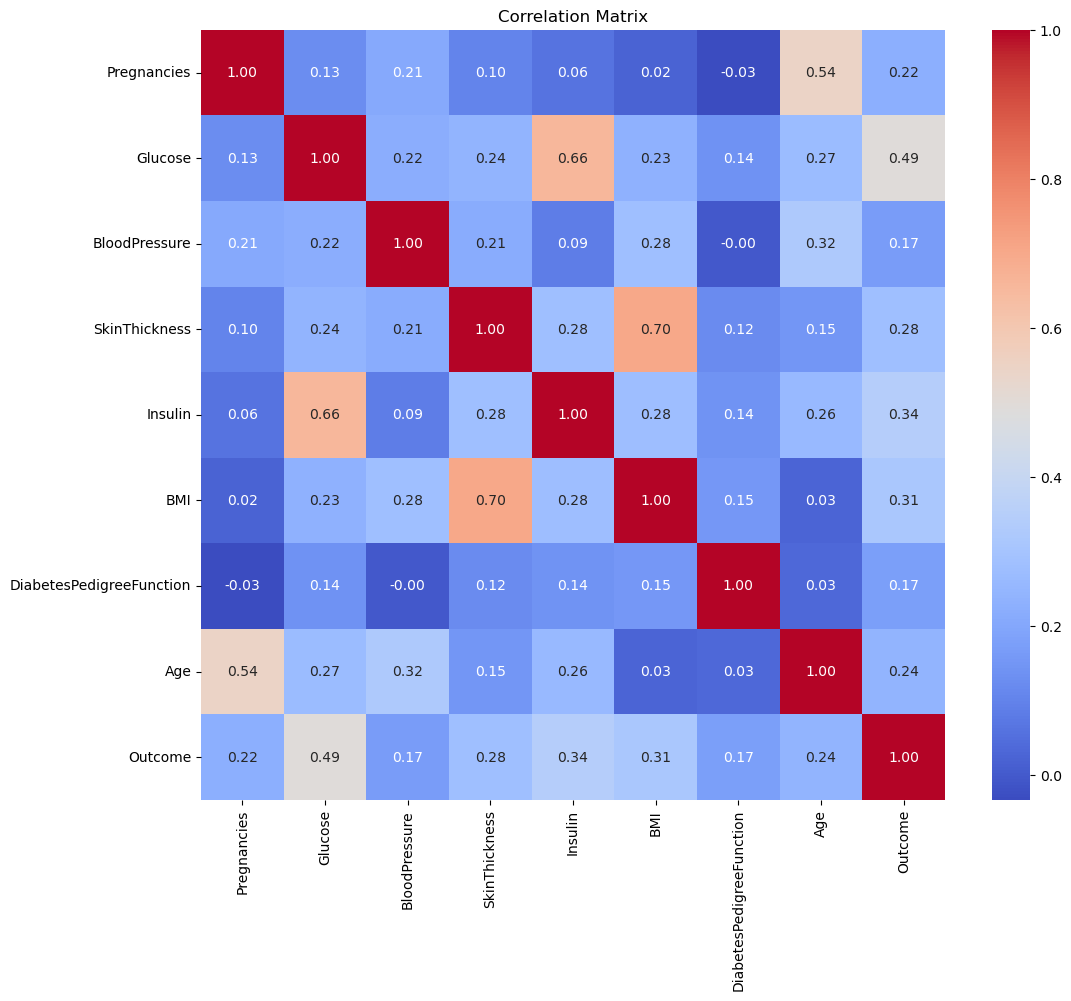

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()


# Define Features && last column "Outcome" as Class

In [48]:
# Define Features && last column "Outcome" as Class
#X = df.iloc[:, :-1]  # Features = "Pregnancies" , "Glucose", "BloodPressure", "SkinThickness", "Inssulin", "BMI", "DiabetesPedigreeFunction", "Age"
#selected_features = ['Glucose', 'Insulin', 'BMI','Age'] #80.519% XGB & 80.519% RF
selected_features = ['Glucose', 'Insulin', 'BMI', 'SkinThickness'] # 82.46% xgb & 78.57% RF
#selected_features = ['Glucose', 'Insulin', 'BMI','BloodPressure', 'Age'] # 77.27% XGB & 77.922% RF
#selected_features = ['Glucose', 'Insulin', 'BMI','BloodPressure', 'Age', 'SkinThickness']  # 78.57% XGB & 76.62% RF
X = df[selected_features]
y = df.iloc[:, -1]   # Class = "Outcome"


## Split data (80:20)

In [50]:
# Split data (80 Train: 20 test)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0,  stratify =y) # paper

## Feature Scaling (Standardization)

In [52]:
# Feature Scaling (Standardization)
scaler = StandardScaler()
#numerical_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']
#df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Fit the scaler on the training data
#X_train_scaled = scaler.fit_transform(X_train)
X_train = scaler.fit_transform(X_train)

# Transform the testing data
#X_test_scaled = scaler.transform(X_test)
X_test = scaler.transform(X_test)


# Check Feature importance

[0.12137908 0.0739702  0.07448958 0.0273249 ]


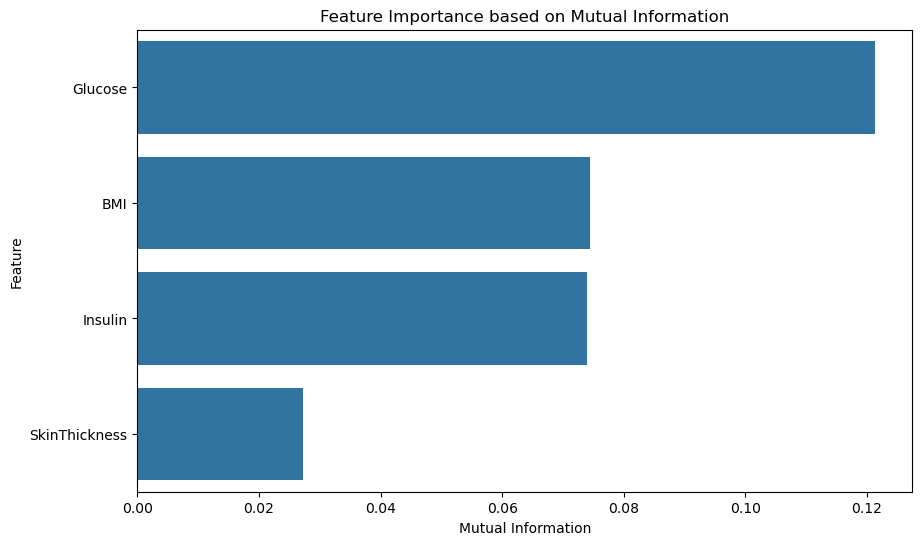

In [54]:
# Check Feature importance
# Calculate mutual information
#mi = mutual_info_classif(X_train, y_train)
mi = mutual_info_classif(X_train, y_train, random_state=42)
#mi = mutual_info_classif(X, y)
#mi = mutual_info_classif(X, y, random_state=42)
print(mi)

# Create a DataFrame for easier visualization
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mi})

# Sort by importance
mi_df = mi_df.sort_values('Mutual Information', ascending=False)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x='Mutual Information', y='Feature', data=mi_df)
plt.title('Feature Importance based on Mutual Information')
plt.show()


## Processing Imbalance data with SMOTE

In [56]:
# Processing Imbalance data with SMOTE
#smote = SMOTE(random_state=42)
#X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

## Check "Outcome" balanced or not

In [58]:
# Check "Outcome" balanced or not
#y_train_smote.value_counts()

# XGB

In [60]:
###The hyperparameter we got from grid search
#gamma=1 + lr0.1 + n100 + maxDepth8 + subsample 0.8 + minChild 1 + scale_pos_weight 1 + bytree 0.8 = 82.4675% (PICK THIS)
from xgboost import XGBClassifier
xgbc = XGBClassifier(colsample_bytree = 0.8,
                     #gamma=1 + lr0.2 + n100 + maxDepth8 + subsample 0.8 + minChild 1 + scale_pos_weight 1 + bytree 0.5 = 77.27%
                     #gamma=1 + lr0.2 + n100 + maxDepth8 + subsample 0.8 + minChild 1 + scale_pos_weight 1 + bytree 0.6 = 77.27%
                     #gamma=1 + lr0.2 + n100 + maxDepth8 + subsample 0.8 + minChild 1 + scale_pos_weight 1 + bytree 0.7 = 77.27%
                    #gamma=1 + lr0.2 + n100 + maxDepth8 + subsample 0.8 + minChild 1 + scale_pos_weight 1 + bytree 0.8 = 81.8181% (PICK THIS)
                     #gamma=1 + lr0.2 + n100 + maxDepth8 + subsample 0.8 + minChild 1 + scale_pos_weight 1 + bytree 0.9 = 81.8181%
                     #gamma=1 + lr0.2 + n100 + maxDepth8 + subsample 0.8 + minChild 1 + scale_pos_weight 1 + bytree 1 = 80.519%
 gamma= 1, # gamma=0 + lr0.2 + n100 = 77.9% gamma=1 + lr0.2 + n100 = 77.2% 
             #gamma=1 + lr0.2 + n100 + maxDepth8 + subsample 0.8 + minChild 1 + scale_pos_weight 1 = 81.8181% (PICK THIS)
 learning_rate=0.1,     # learning rate = 0.15 Acc:76%     learning rate = 0.25 Acc:77.2%       learning rate = 0.05 Acc:75.3% 
                        #learning rate = 0.2 Acc:77.9% (pick this)  learning rate = 0.225 Acc:76.6%  learning rate = 0.3 Acc:77.2%
                         #gamma=0 + lr0.1 + n100 + maxDepth8 + subsample 0.8 + minChild 1 + scale_pos_weight 1 = 78.57%

#gamma=1 + lr0.1 + n100 + maxDepth8 + subsample 0.8 + minChild 1 + scale_pos_weight 1 + bytree 0.8 = 82.4675% (PICK THIS)
#gamma=1 + lr0.05 + n100 + maxDepth8 + subsample 0.8 + minChild 1 + scale_pos_weight 1 + bytree 0.8 = 80.519%
#gamma=1 + lr0.15 + n100 + maxDepth8 + subsample 0.8 + minChild 1 + scale_pos_weight 1 + bytree 0.8 = 82.4675% (AUC = 0.85)
                     
                     
 max_depth= 8, #gamma=0 + lr0.2 + n100 + maxDepth10 = 77.9% gamma=0 + lr0.2 + n100 + maxDepth6 = 77.9% gamma=0 + lr0.2 + n100 + maxDepth7 = 77.9%
                     #gamma=0 + lr0.2 + n100 + maxDepth8 = 78.57% (PICK THIS) 
                     #gamma=0 + lr0.2 + n100 + maxDepth9 = 77.2%
                     #gamma=1 + lr0.2 + n100 + maxDepth15 + subsample 0.8 + minChild 1 + scale_pos_weight 1 + bytree 0.7 = 79.87%
                     #gamma=1 + lr0.2 + n100 + maxDepth9 + subsample 0.8 + minChild 1 + scale_pos_weight 1 + bytree 0.7 = 81.168%
                     #gamma=1 + lr0.2 + n100 + maxDepth7 + subsample 0.8 + minChild 1 + scale_pos_weight 1 + bytree 0.7 = 80.519%
                     #gamma=1 + lr0.2 + n100 + maxDepth3 + subsample 0.8 + minChild 1 + scale_pos_weight 1 + bytree 0.7 = 78.57%

                     #gamma=1 + lr0.2 + n100 + maxDepth8 + subsample 0.8 + minChild 1 + scale_pos_weight 1 + bytree 0.8 = 81.8181% (PICK THIS)
            
                     
 min_child_weight= 1, #gamma=0 + lr0.2 + n100 + maxDepth8 + subsample 0.8 + minChild 1 = 78.57% 
                     #gamma=0 + lr0.2 + n100 + maxDepth8 + subsample 0.8 + minChild 2 = 77.9%
                     #gamma=0 + lr0.2 + n100 + maxDepth8 + subsample 0.8 + minChild 3 = 77.2%
                     
 n_estimators=100, #gamma=0 + lr0.2 + n10 + maxDepth8 + subsample 0.8 + minChild 1 + scale_pos_weight 1 = 79.87%
                     #gamma=0 + lr0.2 + n20 + maxDepth8 + subsample 0.8 + minChild 1 + scale_pos_weight 1 = 80.519%
                     #gamma=0 + lr0.2 + n50 + maxDepth8 + subsample 0.8 + minChild 1 + scale_pos_weight 1 = 80.519%
                     #gamma=0 + lr0.2 + n75 + maxDepth8 + subsample 0.8 + minChild 1 + scale_pos_weight 1 = 79.87%
                   #gamma=0 + lr0.2 + n100 + maxDepth8 + subsample 0.8 + minChild 1 + scale_pos_weight 1 = 81.1688% (PICK THIS)
                   #gamma=0 + lr0.2 + n200 + maxDepth8 + subsample 0.8 + minChild 1 + scale_pos_weight 1 = 79.87%
                   #gamma=0 + lr0.2 + n250 + maxDepth8 + subsample 0.8 + minChild 1 + scale_pos_weight 1 = 79.22%
                   #gamma=0 + lr0.2 + n500 + maxDepth8 + subsample 0.8 + minChild 1 + scale_pos_weight 1 = 78.57%
                   #gamma=0 + lr0.2 + n1000 + maxDepth8 + subsample 0.8 + minChild 1 + scale_pos_weight 1 = 77.9%
                     
 subsample= 0.8, #gamma=0 + lr0.2 + n100 + maxDepth8 + subsample 0.8 = 78.57% 
               #gamma=0 + lr0.2 + n100 + maxDepth8 + subsample 0.9 = 76.6% 
               #gamma=0 + lr0.2 + n100 + maxDepth8 + subsample 1 = 78.57%
               #gamma=0 + lr0.2 + n100 + maxDepth8 + subsample 0.8 = 75.97% 
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1).fit(X_train, y_train) #gamma=0 + lr0.2 + n100 + maxDepth8 + subsample 0.8 + minChild 1 + scale_pos_weight 3 = 78.57%
                                           #gamma=0 + lr0.2 + n100 + maxDepth8 + subsample 0.8 + minChild 1 + scale_pos_weight 2 = 77.2%
                                          #gamma=0 + lr0.2 + n100 + maxDepth8 + subsample 0.8 + minChild 1 + scale_pos_weight 1 = 81.1688% (PICK THIS)

#better at now (26/12/24) paper
#xgbc = XGBClassifier(colsample_bytree = 0.8,
# gamma= 1,
# max_depth= 3,
# min_child_weight= 1,
# subsample= 0.8,
# objective= 'binary:logistic',
# nthread= -1,
# scale_pos_weight=1).fit(X_train_smote, y_train_smote)

In [61]:
from sklearn.metrics import accuracy_score
y_pred=xgbc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test, y_pred))

[[87 13]
 [14 40]]
Accuracy Score 0.8246753246753247
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       100
           1       0.75      0.74      0.75        54

    accuracy                           0.82       154
   macro avg       0.81      0.81      0.81       154
weighted avg       0.82      0.82      0.82       154



In [62]:
from sklearn.model_selection import StratifiedKFold,cross_val_score
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(xgbc,X,y,cv=skfold)
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.7343264578558697 +/- 0.03509217378207131


# Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier

# hyperparameter
#rf = RandomForestClassifier(bootstrap=True, 
#                            max_depth=10, 
#                            max_features='sqrt', 
#                            min_samples_leaf=1, 
#                            min_samples_split=2,  # Correct parameter name
#                            n_estimators=100)


###The hyperparameter we got from grid search (better at not 26/12/24))
rf=RandomForestClassifier(max_depth=780, max_features='log2', n_estimators=600)
### fit the randomized model
rf.fit(X_train, y_train)


# Fit the model
rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=780, max_features='log2', n_estimators=600)

In [65]:
from sklearn.metrics import accuracy_score
y_pred=rf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test, y_pred))
     

[[89 11]
 [19 35]]
Accuracy Score 0.8051948051948052
              precision    recall  f1-score   support

           0       0.82      0.89      0.86       100
           1       0.76      0.65      0.70        54

    accuracy                           0.81       154
   macro avg       0.79      0.77      0.78       154
weighted avg       0.80      0.81      0.80       154



In [66]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(rf,X,y,cv=skfold)
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.7369493251846194 +/- 0.024477554938491762


## AUC

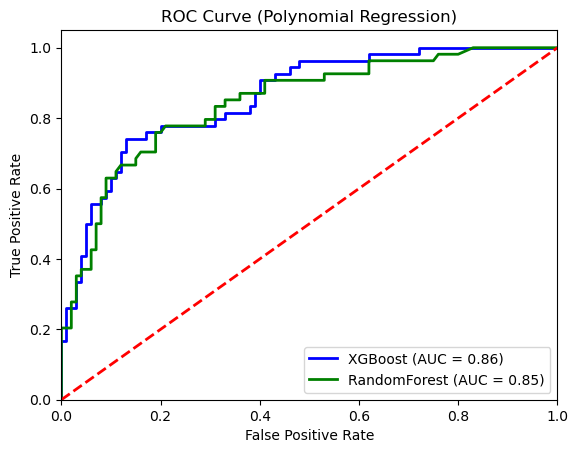

In [68]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Get predicted probabilities
xgbc_pred_proba = xgbc.predict_proba(X_test)[:, 1]
rf_pred_proba = rf.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC for XGBoost
fpr_xgbc, tpr_xgbc, _ = roc_curve(y_test, xgbc_pred_proba)
auc_xgbc = roc_auc_score(y_test, xgbc_pred_proba)

# Calculate ROC curve and AUC for RandomForest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_pred_proba)
auc_rf = roc_auc_score(y_test, rf_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr_xgbc, tpr_xgbc, color='blue', lw=2, label=f'XGBoost (AUC = {auc_xgbc:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'RandomForest (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Polynomial Regression)')
plt.legend(loc="lower right")
plt.show()